### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complains=pd.read_csv('311-service-requests.csv',dtype='unicode')

In [3]:
complains

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


# 2. What's even in it? (the summary)


The Data represents a collection of incidents by different New York City Governent Agencies.

In [4]:
complains.info() #Info prints all the Columns with the type of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [5]:
complains.sample() #Sample randomly selects a row to show what the data format

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1886,26592669,10/30/2013 12:20:00 PM,NaN,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,10065,54 EAST 64 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766467271127844,-73.96855645315843,"(40.766467271127844, -73.96855645315843)"


## spaces in column names are replaced with ‘_’

In [6]:
complains.columns=[column.replace(" ", "_") for column in complains.columns]

In [7]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique_Key                      111069 non-null  object
 1   Created_Date                    111069 non-null  object
 2   Closed_Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency_Name                     111069 non-null  object
 5   Complaint_Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location_Type                   79022 non-null   object
 8   Incident_Zip                    98807 non-null   object
 9   Incident_Address                84441 non-null   object
 10  Street_Name                     84432 non-null   object
 11  Cross_Street_1                  84728 non-null   object
 12  Cross_Street_2                

# 3. Convert the data time columns in the data set from object to datetime format

In [16]:
complains['Created_Date']=pd.to_datetime(complains['Created_Date'])
complains['Closed_Date']=pd.to_datetime(complains['Closed_Date'])

In [17]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency_Name                     111069 non-null  object        
 4   Complaint_Type                  111069 non-null  object        
 5   Descriptor                      110613 non-null  object        
 6   Location_Type                   79022 non-null   object        
 7   Incident_Zip                    98807 non-null   object        
 8   Incident_Address                84441 non-null   object        
 9   Street_Name                     84432 non-null   object        
 10  Cross_Street_1                  84728 non-null   object 

# 4. Drop all the columns where most of the rows are null. Think logically

In [19]:
complains.drop(['School_City','School_State','School_Zip'], axis=1, inplace=True)

In [20]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency_Name                     111069 non-null  object        
 4   Complaint_Type                  111069 non-null  object        
 5   Descriptor                      110613 non-null  object        
 6   Location_Type                   79022 non-null   object        
 7   Incident_Zip                    98807 non-null   object        
 8   Incident_Address                84441 non-null   object        
 9   Street_Name                     84432 non-null   object        
 10  Cross_Street_1                  84728 non-null   object 

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [23]:
complains['Complaint_Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint_Type, Length: 165, dtype: int64

In [26]:
complains.head()

,Unique_Key,Created_Date,Closed_Date,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,...,Taxi_Company_Borough,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Location
0,26589651,2013-10-31 02:08:41,NaT,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaT,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,2013-10-31 02:40:32,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,2013-10-31 02:21:48,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaT,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.80769092704951, -73.94738703491433)"


# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [28]:
complains[['Complaint_Type', 'Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [66]:
complains1=complains.rename(columns={'Borough' : 'District'})

In [68]:
complains1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency_Name                     111069 non-null  object        
 4   Complaint_Type                  111069 non-null  object        
 5   Descriptor                      110613 non-null  object        
 6   Location_Type                   79022 non-null   object        
 7   Incident_Zip                    98807 non-null   object        
 8   Incident_Address                84441 non-null   object        
 9   Street_Name                     84432 non-null   object        
 10  Cross_Street_1                  84728 non-null   object 

# 8. What's the most common complaint type?
display top 10 most common compalin


In [52]:
complaint_counts = complains['Complaint_Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

#  Plot the top 10 most common compalin

<AxesSubplot:ylabel='Complaint_Type'>

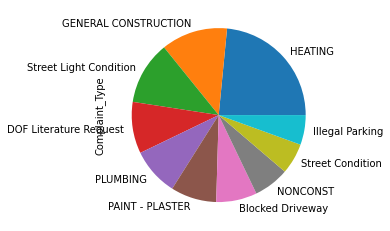

In [55]:
complaint_counts[:10].plot(kind='pie')

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [73]:
complains1.groupby(['District','Complaint_Type']).count()

Unique_Key  Created_Date  \
District    Complaint_Type                                                
BRONX       APPLIANCE                                 108           108   
            Air Quality                                40            40   
            Animal Abuse                              162           162   
            Animal in a Park                           17            17   
            Asbestos                                   17            17   
...                                                   ...           ...   
Unspecified Taxi Compliment                            73            73   
            Traffic Signal Condition                   10            10   
            Transportation Provider Complaint           1             1   
            Vacant Lot                                  3             3   
            Water System                                2             2   

                                               Closed_Date  Agency_Name  \
District    Complaint_Type                                                
BRONX       APPLIANCE                                   10          108   
            Air Quality                                  2           40   
            Animal Abuse                               162          162   
            Animal in a Park                            17           17   
            Asbestos                                     1           17   
...                                                    ...          ...   
Unspecified Taxi Compliment                              0           73   
            Traffic Signal Condition                    10           10   
            Transportation Provider Complaint            1            1   
            Vacant Lot                                   0            3   
            Water System                                 2            2   

                                               Descriptor  Location_Type  \
District    Complaint_Type                                                 
BRONX       APPLIANCE                                 108            108   
            Air Quality                                40              0   
            Animal Abuse                              162            162   
            Animal in a Park                           17             17   
            Asbestos                                    9              8   
...                                                   ...            ...   
Unspecified Taxi Compliment                            73              0   
            Traffic Signal Condition                   10              0   
            Transportation Provider Complaint           0              1   
            Vacant Lot                                  3              3   
            Water System                                2              0   

                                               Incident_Zip  Incident_Address  \
District    Complaint_Type                                                      
BRONX       APPLIANCE                                   108               108   
            Air Quality                                  40                36   
            Animal Abuse                                162               140   
            Animal in a Park                             16                 0   
            Asbestos                                     17                17   
...                                                     ...               ...   
Unspecified Taxi Compliment                               0                 0   
            Traffic Signal Condition                      0                 0   
            Transportation Provider Complaint             0                 0   
            Vacant Lot                                    0                 3   
            Water System                                  0                 2   

                                               Stree

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [77]:
new_complaint=complains.query('Complaint.Type=="Illegal Parking"').head()

UndefinedVariableError: name 'Complaint' is not defined

# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data